# Combining DataFrames and EDA #

- Examining Features in the Restaurant DataFrame

- Dummying Features from the Restaurant DataFame

- Aggregating Home Values

- We are combining features from the Restaurant DataFrame to Propety Values

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yelp_df = pd.read_csv('./data/yelp_final_df_150.csv', index_col = 0)
property_df = pd.read_csv('./data/property_final_df_labeled_150.csv', index_col=0)

In [3]:
yelp_df.type.value_counts().shape

(216,)

Examining non restaurant sounding 'type' tag. Type is metadata describing restaurants from Yelp's database.

We will drop non restaurants from the restaurant dataframe.

In [4]:
yelp_df[
    (yelp_df.type=='eventplanning')|
    (yelp_df.type=='electronicsrepair')|
    (yelp_df.type=='yoga')|
    (yelp_df.type=='petadoption')|
    (yelp_df.type=='museums')|
    (yelp_df.type=='florists')|
    (yelp_df.type=='mencloth')|
    (yelp_df.type=='barbers')|
    (yelp_df.type=='partysupplies')|
    (yelp_df.type=='suppliesrestaurant')|
    (yelp_df.type=='vitaminssupplements')|
    (yelp_df.type=='cookingschools')|
    (yelp_df.type=='musicians')
]

,name,id,price,alias,type,category,rating,zip,latitude,longitude,labels_km,centroid_latitude,centroid_longitude,distance_centroid
3374,Lassens Natural Foods & Vitamins,RmV5P6tQ5i40un4N3_xZlQ,2.0,lassens-natural-foods-and-vitamins-los-angeles-2,vitaminssupplements,vitaminssupplements,3.0,90026,34.0777,-118.258,68,34.076694,-118.260156,0.002379
3783,CatCafe Lounge,ajs7RHssyl-JWmnBmxkDAQ,2.0,catcafe-lounge-los-angeles-4,petadoption,petadoption,5.0,90025,34.0468,-118.443,45,34.039993,-118.439171,0.007811
6850,Hyperslow,izRKrrHUTYAgQFlmmABKTA,1.0,hyperslow-los-angeles-3,yoga,yoga,4.5,90036,34.0676,-118.362,27,34.073348,-118.361703,0.005756
6980,Le Petit Jardin Cafe & Flowers,9zzMz0F-fkmgjcPN6DLzpQ,2.0,le-petit-jardin-cafe-and-flowers-los-angeles-2,florists,florists,4.0,90035,34.0532,-118.384,0,34.052090,-118.383210,0.001362
7414,Smaffee Cafe,uVVjfDCDOMg1ve76k3W3gA,1.0,smaffee-cafe-los-angeles-3,electronicsrepair,electronicsrepair,4.5,90019,34.0527,-118.318,92,34.054884,-118.308902,0.009356
8288,Lassens Natural Foods & Vitamins,RmV5P6tQ5i40un4N3_xZlQ,2.0,lassens-natural-foods-and-vitamins-los-angeles-2,vitaminssupplements,vitaminssupplements,3.0,90026,34.0777,-118.258,68,34.076694,-118.260156,0.002379
8417,CatCafe Lounge,ajs7RHssyl-JWmnBmxkDAQ,2.0,catcafe-lounge-los-angeles-4,petadoption,petadoption,5.0,90025,34.0468,-118.443,45,34.039993,-118.439171,0.007811
10416,Barber Lounge,-bMqMv4rM7urOYgIVnXRqg,2.0,barber-lounge-culver-city-3,barbers,barbers,3.0,90230,33.9854,-118.395,40,33.987326,-118.393104,0.002702
10506,Flowers By Felicia,QYzvWIwaVaMYsx3qX4c5DA,2.0,flowers-by-felicia-playa-del-rey,florists,florists,4.0,90293,33.9567,-118.442,84,33.962326,-118.446000,0.006903
11365,Space Shuttle Endeavour,GxoqGOsu23p7co-dTR1X2A,1.0,space-shuttle-endeavour-los-angeles,museums,museums,5.0,90037,34.0162,-118.287,42,34.018695,-118.282065,0.005530


Dropping Pet adoption and types above. Not a restaurant

In [5]:
drop_index = yelp_df[
    (yelp_df.type=='eventplanning')|
    (yelp_df.type=='electronicsrepair')|
    (yelp_df.type=='yoga')|
    (yelp_df.type=='petadoption')|
    (yelp_df.type=='museums')|
    (yelp_df.type=='florists')|
    (yelp_df.type=='mencloth')|
    (yelp_df.type=='barbers')|
    (yelp_df.type=='partysupplies')|
    (yelp_df.type=='suppliesrestaurant')|
    (yelp_df.type=='vitaminssupplements')|
    (yelp_df.type=='cookingschools')|
    (yelp_df.type=='musicians')
].index.tolist()

In [6]:
yelp_df.drop(index=drop_index, inplace=True)

In [7]:
yelp_df[yelp_df.type=='petadoption']

,name,id,price,alias,type,category,rating,zip,latitude,longitude,labels_km,centroid_latitude,centroid_longitude,distance_centroid


In [8]:
yelp_df.shapeb

(21723, 14)

**Examining Prices**


- Prices are skewed towards 1.0
- We have very little representation for the most expensive restaurants
- The increments and consistency of a 1.0 increase in Price across regions is not uniform (i.e. a 2.0 price restaurant does not equal an average menu price of $20

In [52]:
yelp_df.price.value_counts()

1.0    10654
2.0     9998
3.0      870
4.0      201
Name: price, dtype: int64

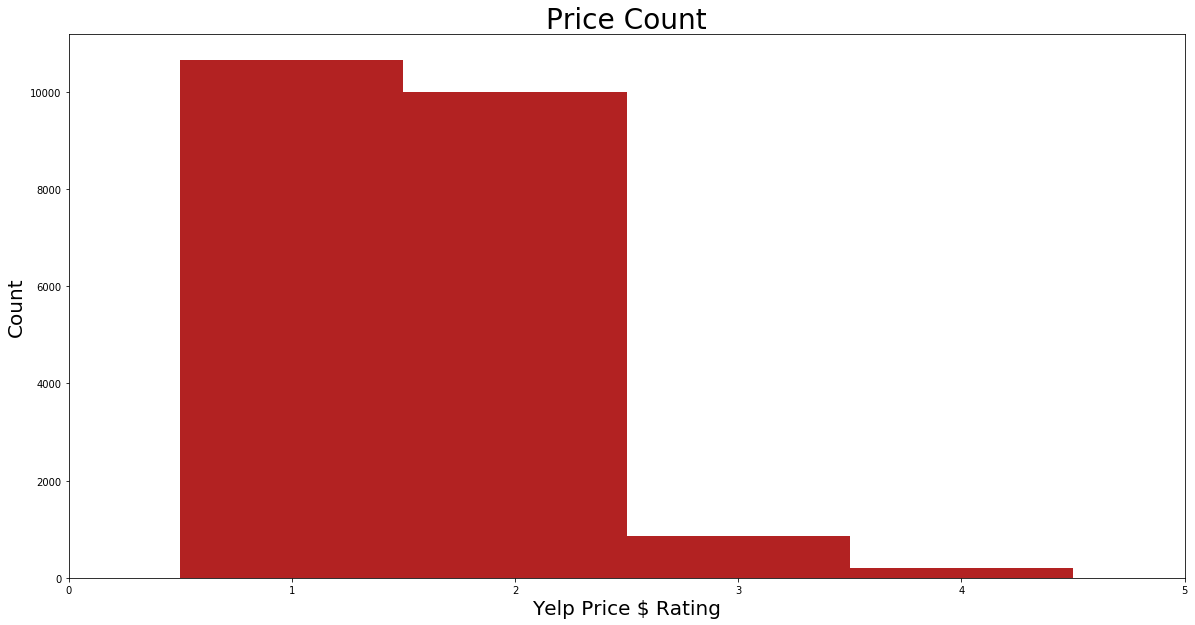

In [98]:
plt.figure(figsize=(20,10))
plt.hist(yelp_df.price, color='firebrick', bins=np.arange(10)-0.5, align='mid')
plt.title('Price Count', fontsize=28)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Yelp Price $ Rating', fontsize=20)
plt.xlim(0, 5.0);

**Examining Home Values Per Cluster**

Homes vary in a wide range from each cluster. 

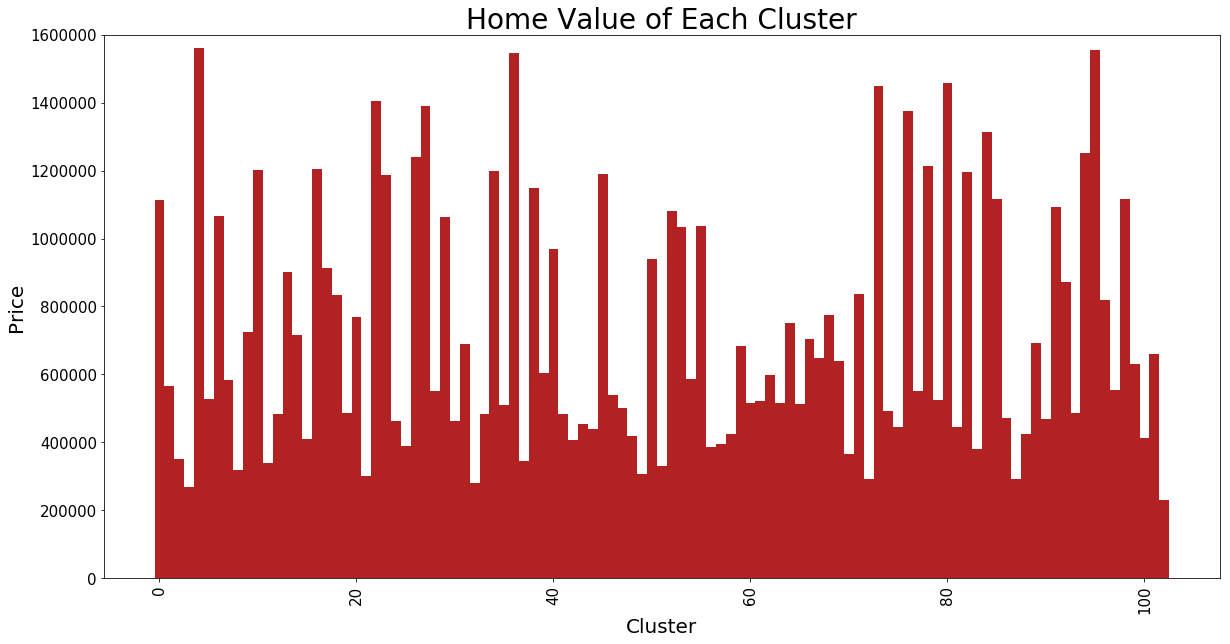

In [128]:
plt.figure(figsize =(20,10))
bar_width = 1
ind = np.arange(len(property_df['labels_km'].value_counts().index))
plt.bar(ind, property_df.groupby('labels_km')['value'].mean(), bar_width, color='firebrick', align='center')
plt.tick_params(axis='x', labelsize=15, labelrotation=90)
plt.tick_params(axis='y', labelsize=15, labelrotation=0)

plt.title('Home Value of Each Cluster', fontsize=28)
plt.ylabel('Price', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
plt.ylim(0, 1_600_000);

**Combining Categories**

These categories will be combined into "Other" because of low value counts. Although this is not the most sound model, most of these restaurants are niche or subcategories. 

The purpose for this will be to dummy out the column "Type". Only keeping the top 50 types.

In [9]:
yelp_df.type.value_counts().shape

(204,)

In [10]:
len(yelp_df.type.value_counts()[yelp_df.type.value_counts()<=80].index.tolist())

153

In [11]:
other_cat = yelp_df.type.value_counts()[yelp_df.type.value_counts()<=80].index.tolist()

In [12]:
yelp_df.loc[yelp_df.type.isin(other_cat), 'type'] = 'aa_other'

In [13]:
yelp_df[yelp_df['type']=='aa_other'].shape

(2426, 14)

In [14]:
yelp_df.type.value_counts().shape

(52,)

In [15]:
yelp_df.reset_index(drop=True, inplace=True)

In [16]:
yelp_df.rating.value_counts()

4.0    7536
3.5    4557
4.5    4118
3.0    2060
2.5    1279
2.0     894
5.0     829
1.5     395
1.0      54
0.0       1
Name: rating, dtype: int64

In [17]:
yelp_df.rating.describe()

count    21723.000000
mean         3.709501
std          0.763096
min          0.000000
25%          3.500000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [18]:
yelp_df.groupby('labels_km')['price'].describe().head()

,count,mean,std,min,25%,50%,75%,max
labels_km,,,,,,,,
0,227.0,1.757709,0.622847,1.0,1.0,2.0,2.0,4.0
1,68.0,1.367647,0.515561,1.0,1.0,1.0,2.0,3.0
2,222.0,1.117117,0.322286,1.0,1.0,1.0,1.0,2.0
3,775.0,1.665806,0.653399,1.0,1.0,2.0,2.0,4.0
4,34.0,1.882353,0.477665,1.0,2.0,2.0,2.0,3.0


In [19]:
yelp_df['price'][yelp_df['labels_km']==3].value_counts()

2.0    403
1.0    323
3.0     34
4.0     15
Name: price, dtype: int64

**Creating Dummies DataFrame for Yelp**

- Type
- Rating
- Price

In [20]:
yelp_df_dummies = pd.get_dummies(yelp_df, columns=['type','rating','price'])

In [21]:
yelp_df_dummies.drop(columns='alias', inplace=True)

In [22]:
price_col = yelp_df_dummies.columns[yelp_df_dummies.columns.str.contains('price')].tolist()

In [23]:
yelp_df_dummies.shape

(21723, 76)

In [24]:
yelp_df_dummies.to_csv('./data/yelp_df_dummies_150.csv', header=yelp_df_dummies.columns)

## Preprocessing Property DataFrame##

In [25]:
property_df.head()

,property_id,address,zip,year_reassessed,value,latitude,longitude,county_cluster,cluster,labels_km,centroid_latitude,centroid_longitude,distance_centroid
0,2872021039,18501 CALLE VISTA CIR LOS ANGELES CA 91326,91326,2017,1288400.0,34.2853,-118.535,2102,-1,89,34.263419,-118.522291,0.025305
1,2872021038,18500 CALLE VISTA CIR LOS ANGELES CA 91326,91326,2011,619286.0,34.2849,-118.534,2102,-1,89,34.263419,-118.522291,0.024465
2,2872021017,18504 ENTRADA CT LOS ANGELES CA 91326,91326,2012,618184.0,34.2842,-118.534,2102,-1,89,34.263419,-118.522291,0.023853
3,2872021010,18526 ENTRADA CT LOS ANGELES CA 91326,91326,2014,748768.0,34.2829,-118.535,2102,-1,89,34.263419,-118.522291,0.023261
4,2872021001,18501 BRASILIA DR LOS ANGELES CA 91326,91326,2011,613655.0,34.2823,-118.535,2102,-1,89,34.263419,-118.522291,0.022760


In [26]:
property_df.shape

(129036, 13)

We have extreme outliers in the DataFrame. On the lowend, we have homes that have no been built yet and we also have $100 Million homes. Homes from 200,000 to 2,000,0000 in value will be used in our modeling.

The remaining homes were dropped, leaving 115,000 properties remaining.

In [27]:
property_df.value.describe(percentiles=[.05, .1, .25, .5, .75, .9, .95, .99]).T.round(0)


count       129036.0
mean        936623.0
std        1605034.0
min              0.0
5%          237018.0
10%         289784.0
25%         399890.0
50%         580944.0
75%         957167.0
90%        1774520.0
95%        2601000.0
99%        5836862.0
max      113871000.0
Name: value, dtype: float64

In [28]:
property_df['zip'][property_df.value<=200000].value_counts().head(10)

90002    325
90003    300
90059    272
90011    227
90044    211
90014    209
90016    153
90047    148
90017    122
90013     93
Name: zip, dtype: int64

In [29]:
property_df.drop(property_df[(property_df['value']<200_000)|(property_df['value']>2_000_000)].index, inplace=True)

In [30]:
property_df[(property_df['value']<200_000)]

,property_id,address,zip,year_reassessed,value,latitude,longitude,county_cluster,cluster,labels_km,centroid_latitude,centroid_longitude,distance_centroid


In [31]:
property_df.shape

(115080, 13)

In [32]:
property_df.reset_index(drop=True, inplace=True)

Creating aggregate yelp data to attach to property data frame for modeling

In [33]:
price_col = yelp_df_dummies.columns[yelp_df_dummies.columns.str.contains('price')].tolist()
rating_col = yelp_df_dummies.columns[yelp_df_dummies.columns.str.contains('rating')].tolist()
type_col = yelp_df_dummies.columns[yelp_df_dummies.columns.str.contains('type')].tolist()

In [34]:
yelp_df_dummies[price_col].describe().T

,count,mean,std,min,25%,50%,75%,max
price_1.0,21723.0,0.490448,0.499920,0.0,0.0,0.0,1.0,1.0
price_2.0,21723.0,0.460250,0.498429,0.0,0.0,0.0,1.0,1.0
price_3.0,21723.0,0.040050,0.196080,0.0,0.0,0.0,0.0,1.0
price_4.0,21723.0,0.009253,0.095748,0.0,0.0,0.0,0.0,1.0


In [35]:
price_count = yelp_df_dummies.groupby('labels_km')[price_col].sum()
rating_count = yelp_df_dummies.groupby('labels_km')[rating_col].sum()
type_count = yelp_df_dummies.groupby('labels_km')[type_col].sum()

In [36]:
price_count.head()

,price_1.0,price_2.0,price_3.0,price_4.0
labels_km,,,,
0,73.0,141.0,8.0,5.0
1,44.0,23.0,1.0,0.0
2,196.0,26.0,0.0,0.0
3,323.0,403.0,34.0,15.0
4,6.0,26.0,2.0,0.0


### Creating a final DataFrame

The final DataFrame will be a combination of aggregate home values and distance from their respective cluster centroids and Yelp features counts(occurence of each feature per cluster).

In [37]:
property_df_agg = property_df.groupby('labels_km')[['value','distance_centroid']].mean()
property_df_agg.value = round(property_df_agg.value,0)
property_df_agg.head()

,value,distance_centroid
labels_km,,
0,1113719.0,0.012419
1,566461.0,0.013537
2,349797.0,0.012993
3,267585.0,0.005274
4,1559593.0,0.020146


Creating a function to attach dummied yelp data to aggregate property DataFrame

In [38]:
def column_creator(dataframe):
    
    for col in dataframe.columns:
        property_df_agg[col] = property_df_agg.index.map(lambda x: dataframe.loc[x, col]) 
            
    return property_df_agg.head()

In [39]:
column_creator(price_count)

,value,distance_centroid,price_1.0,price_2.0,price_3.0,price_4.0
labels_km,,,,,,
0,1113719.0,0.012419,73.0,141.0,8.0,5.0
1,566461.0,0.013537,44.0,23.0,1.0,0.0
2,349797.0,0.012993,196.0,26.0,0.0,0.0
3,267585.0,0.005274,323.0,403.0,34.0,15.0
4,1559593.0,0.020146,6.0,26.0,2.0,0.0


In [40]:
column_creator(rating_count)

,value,distance_centroid,price_1.0,price_2.0,price_3.0,price_4.0,rating_0.0,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
labels_km,,,,,,,,,,,,,,,,
0,1113719.0,0.012419,73.0,141.0,8.0,5.0,0.0,0.0,4.0,5.0,11.0,16.0,48.0,75.0,56.0,12.0
1,566461.0,0.013537,44.0,23.0,1.0,0.0,0.0,0.0,3.0,5.0,13.0,12.0,13.0,12.0,9.0,1.0
2,349797.0,0.012993,196.0,26.0,0.0,0.0,0.0,3.0,4.0,6.0,19.0,39.0,20.0,64.0,52.0,15.0
3,267585.0,0.005274,323.0,403.0,34.0,15.0,0.0,1.0,2.0,8.0,23.0,63.0,171.0,296.0,181.0,30.0
4,1559593.0,0.020146,6.0,26.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,11.0,7.0,2.0


In [41]:
column_creator(type_count)

,value,distance_centroid,price_1.0,price_2.0,price_3.0,price_4.0,rating_0.0,rating_1.0,rating_1.5,rating_2.0,...,type_seafood,type_sportsbars,type_streetvendors,type_sushi,type_tacos,type_thai,type_tradamerican,type_vegan,type_vietnamese,type_wine_bars
labels_km,,,,,,,,,,,,,,,,,,,,,
0,1113719.0,0.012419,73.0,141.0,8.0,5.0,0.0,0.0,4.0,5.0,...,4,0,2,11,0,10,1,0,0,0
1,566461.0,0.013537,44.0,23.0,1.0,0.0,0.0,0.0,3.0,5.0,...,0,0,0,0,0,1,2,0,0,0
2,349797.0,0.012993,196.0,26.0,0.0,0.0,0.0,3.0,4.0,6.0,...,9,0,2,0,2,0,0,0,3,0
3,267585.0,0.005274,323.0,403.0,34.0,15.0,0.0,1.0,2.0,8.0,...,13,6,3,15,1,7,18,6,4,4
4,1559593.0,0.020146,6.0,26.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,2,0,0,0,0,0,0


In [42]:
property_df_agg.head()

,value,distance_centroid,price_1.0,price_2.0,price_3.0,price_4.0,rating_0.0,rating_1.0,rating_1.5,rating_2.0,...,type_seafood,type_sportsbars,type_streetvendors,type_sushi,type_tacos,type_thai,type_tradamerican,type_vegan,type_vietnamese,type_wine_bars
labels_km,,,,,,,,,,,,,,,,,,,,,
0,1113719.0,0.012419,73.0,141.0,8.0,5.0,0.0,0.0,4.0,5.0,...,4,0,2,11,0,10,1,0,0,0
1,566461.0,0.013537,44.0,23.0,1.0,0.0,0.0,0.0,3.0,5.0,...,0,0,0,0,0,1,2,0,0,0
2,349797.0,0.012993,196.0,26.0,0.0,0.0,0.0,3.0,4.0,6.0,...,9,0,2,0,2,0,0,0,3,0
3,267585.0,0.005274,323.0,403.0,34.0,15.0,0.0,1.0,2.0,8.0,...,13,6,3,15,1,7,18,6,4,4
4,1559593.0,0.020146,6.0,26.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,2,0,0,0,0,0,0


In [43]:
property_df_agg.to_csv('./data/property_final_df_labeled_cleaned_150.csv', header=property_df_agg.columns)